# ColabLinearRegresionTensorFlow (DUE 12. November)
In this Colab you will implement linear regression with Tensorflow-Keras [tf.keras](https://www.tensorflow.org/guide/keras), a high level library for machine learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import tensorflow as tf
sns.set_style("whitegrid")
sns.set_context("poster")


from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
print(np.shape(X_train), np.shape(X_test))

(404, 13) (102, 13)


In [32]:
#perform data normalization
mu = np.mean(X_train,axis=0)
sigma = np.std(X_train,axis=0)
X_train = (X_train - mu)/sigma
mu = np.mean(X_test,axis=0)
sigma = np.std(X_test,axis=0)
X_test = (X_test - mu)/sigma

print(np.shape(X_train), np.shape(X_test))
print(y_train)

(404, 13) (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

### To perform the linear regression task, use the sequential Model of Keras. Check out:
[tf.keras.Sequential](https://www.tensorflow.org/guide/keras/sequential_model?hl=de).

Fill into your model an input with shape (13,1), the bias term `=[column of ones]` is added automatically, you don't need to do it here. 

Finally add a dense layer [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?hl=de) with output of 1. The output is a scalar, the price of a house, therefore it has a dimension of 1. **(10 Pts)**

In [33]:
house_model = tf.keras.Sequential(
      [
      tf.keras.layers.Input(shape=(13,)),
      tf.keras.layers.Dense(1)
      ]
)


### Use the method [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) for your model that you created with tf.keras.Sequential. Use the [stochastic gradient descent optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) with learning rate = 0.0001 and as a loss the mean squared error. **(10 Pts)**


In [36]:
house_model.compile(optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.0001), loss=tf.keras.losses.MeanSquaredError())
              

### Use the method [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) to train the model. Pass X_train, y_train, a batch_size of 1 and train for 1000 epochs. **(10 Pts)**

In [37]:
house_model.fit(x=X_train, y=y_train, batch_size=1, epochs=1000)

Epoch 1/1000
404/404 [==============================] - 1s 2ms/step - loss: 539.8762
Epoch 2/1000
404/404 [==============================] - 1s 2ms/step - loss: 453.1344
Epoch 3/1000
404/404 [==============================] - 1s 2ms/step - loss: 385.4962
Epoch 4/1000
404/404 [==============================] - 1s 2ms/step - loss: 330.1771
Epoch 5/1000
404/404 [==============================] - 1s 1ms/step - loss: 283.8319
Epoch 6/1000
404/404 [==============================] - 1s 1ms/step - loss: 244.8541
Epoch 7/1000
404/404 [==============================] - 1s 1ms/step - loss: 211.8144
Epoch 8/1000
404/404 [==============================] - 1s 1ms/step - loss: 183.8020
Epoch 9/1000
404/404 [==============================] - 1s 1ms/step - loss: 159.9488
Epoch 10/1000
404/404 [==============================] - 1s 1ms/step - loss: 139.7004
Epoch 11/1000
404/404 [==============================] - 1s 1ms/step - loss: 122.4915
Epoch 12/1000
404/404 [==============================] - 1s 2ms

Estimate the parameters with the normal equation as you did in the LinearRegression.ipynb to have the optimal ones.

In [41]:
opt = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_train),X_train)),np.transpose(X_train)),y_train)
print(opt)

[-1.10749194  1.35308963  0.02710126  0.9943535  -2.40156557  2.3962877
  0.2111952  -3.47121628  2.90814885 -1.95741889 -1.98298545  0.81955092
 -4.02739073]


### Use the method summary and display the trainable_weights to compare with the optimum.

In [42]:
house_model.summary()
house_model.trainable_weights
#the result that you should get is displayed below

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense_9/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[-1.1056522 ],
        [ 1.349534  ],
        [ 0.02349747],
        [ 0.99904424],
        [-2.4007    ],
        [ 2.3928938 ],
        [ 0.21239462],
        [-3.477042  ],
        [ 2.891559  ],
        [-1.9346306 ],
        [-1.9814548 ],
        [ 0.8162007 ],
        [-4.0231714 ]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float32, numpy=array([22.395325], dtype=float32)>]

### Use the [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) method of your model to predict the prices for your test dataset.**(10 Pts)**

In [44]:
y_hat = house_model.predict(X_test, batch_size=1)


102/102 [==============================] - 0s 1ms/step


In [45]:
print(np.shape(y_hat), y_hat)
#result is displayed below

(102, 1) [[ 5.5958633]
 [20.025057 ]
 [20.540886 ]
 [32.843548 ]
 [25.638182 ]
 [19.46975  ]
 [29.263424 ]
 [25.368351 ]
 [18.759415 ]
 [21.70196  ]
 [18.92366  ]
 [17.19696  ]
 [14.786097 ]
 [35.339886 ]
 [16.963058 ]
 [20.172401 ]
 [24.802477 ]
 [21.407806 ]
 [18.742191 ]
 [21.525894 ]
 [ 9.042021 ]
 [14.256135 ]
 [21.764706 ]
 [13.184532 ]
 [22.90031  ]
 [22.962803 ]
 [32.31063  ]
 [26.933737 ]
 [10.330973 ]
 [21.222336 ]
 [22.761942 ]
 [16.563686 ]
 [35.940018 ]
 [23.599049 ]
 [16.914011 ]
 [ 1.5163898]
 [11.932956 ]
 [21.857841 ]
 [15.033007 ]
 [28.747818 ]
 [23.414421 ]
 [28.428452 ]
 [15.559252 ]
 [34.868656 ]
 [30.922937 ]
 [24.020157 ]
 [30.92135  ]
 [17.310966 ]
 [21.302591 ]
 [23.843582 ]
 [32.500168 ]
 [18.843332 ]
 [ 7.4198885]
 [12.517751 ]
 [35.30525  ]
 [27.567114 ]
 [15.244687 ]
 [40.204052 ]
 [37.30576  ]
 [24.66906  ]
 [24.591637 ]
 [18.493818 ]
 [17.359459 ]
 [20.34197  ]
 [24.499456 ]
 [25.416887 ]
 [15.198185 ]
 [27.959019 ]
 [ 1.6840744]
 [ 7.81956  ]
 [22.015942

Plot the estimated prices by your model vs real prices.

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

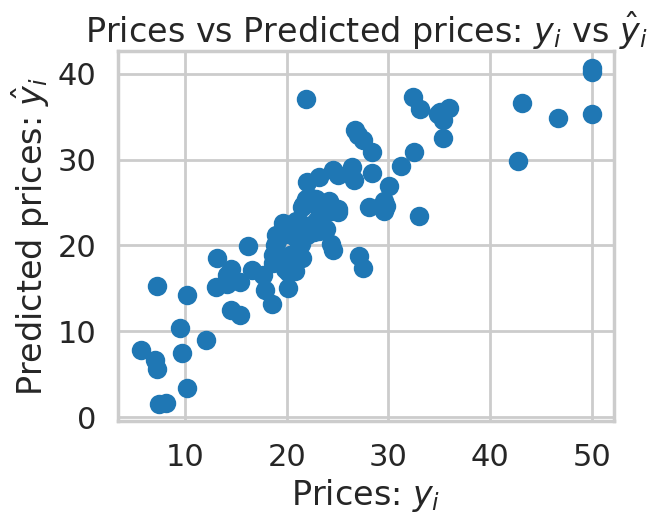

In [46]:
plt.scatter(y_test, y_hat)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")
#result that you should get is displayed below